In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [61]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [62]:
data= pd.read_csv("C:/Users/puadh/Desktop/Github file/iris.csv")
data.head() #independent features

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
data = data.drop(columns = ['Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [66]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [67]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [68]:
#assigning input and output variables
x= data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=data['Species']


<Axes: >

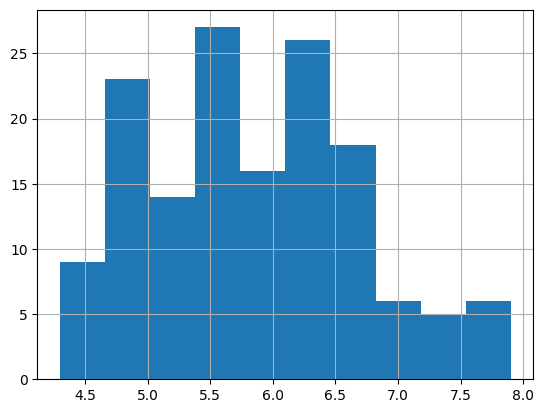

In [69]:
data['SepalLengthCm'].hist()

<Axes: >

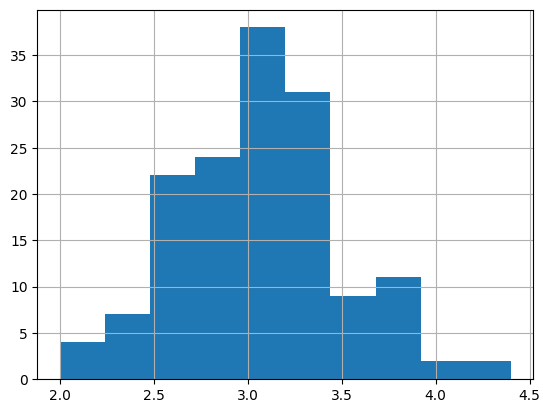

In [70]:
data['SepalWidthCm'].hist()

<Axes: >

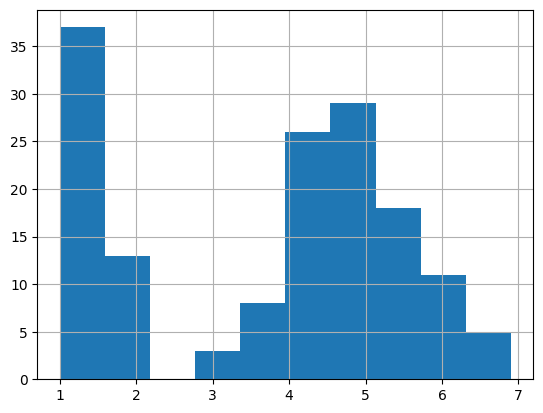

In [71]:
data['PetalLengthCm'].hist()

<Axes: >

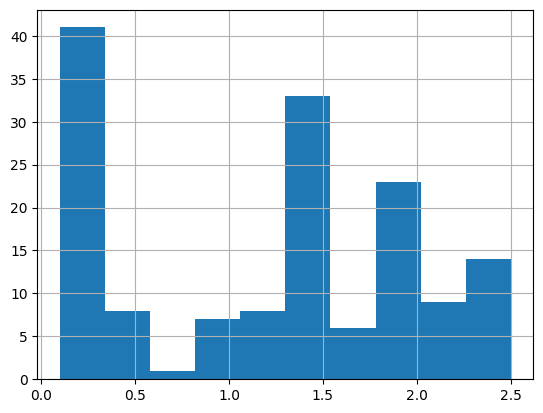

In [72]:
data['PetalWidthCm'].hist()

<Axes: >

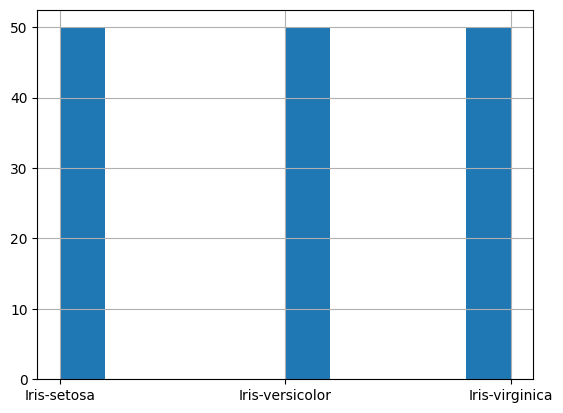

In [73]:
data['Species'].hist()

In [74]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [75]:
colors= ['red','orange','blue']
Species = ['Iris-setosa','Iris-virginica','Iris-versicolor']

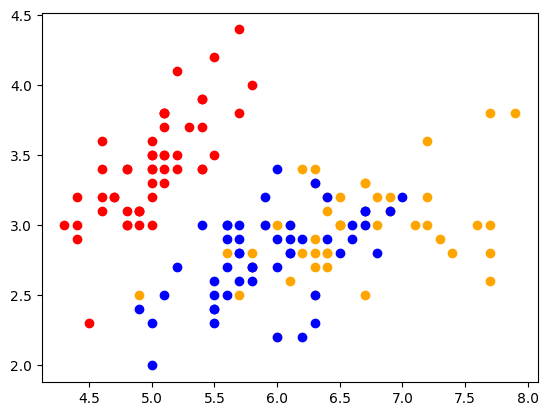

In [76]:
for i in range(3):
    x = data[data['Species']== Species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c= colors[i], label = Species[i])

In [77]:
data.corr()

C:\Users\puadh\AppData\Local\Temp\ipykernel_3108\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\puadh\AppData\Local\Temp\ipykernel_3108\2870058427.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

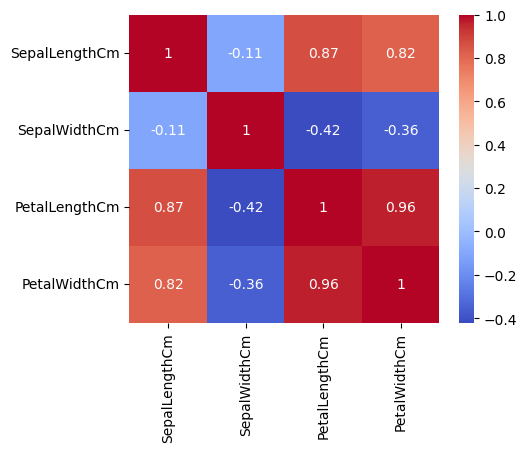

In [78]:
corr = data.corr()
fig, ax = plt.subplots(figsize = (5, 4))
sns.heatmap(corr, annot = True, ax=ax, cmap = 'coolwarm')

In [79]:
#label encoder
#convert the categorical variables into numeric variables using label encoder to machine readable form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [80]:
#model training
from sklearn.model_selection import train_test_split
x = data.drop(columns =['Species'])
y = data['Species']
X_train, X_test, Y_train,  Y_test = train_test_split(x, y,test_size = 0.2, shuffle = True)

In [81]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [82]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 1, 2, 2, 2, 1])

In [83]:
print("Accuracy: ", model.score(X_test, Y_test)*100)

Accuracy:  96.66666666666667


In [84]:
#knn- k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [85]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2,
       1, 0, 0, 1, 2, 2, 2, 1])

In [93]:
print("Accuracy: ", knn.score(X_test, Y_test)*100)

Accuracy:  96.66666666666667


Linear regression 

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [88]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [89]:
y_pred = reg.predict(x)
#y_pred
r2_score = reg.score(x,y)
r2_score

0.9304223675331595

Random Forest Classifier

In [107]:
#build classification model using Random forest
clf = RandomForestClassifier()
clf.fit(x,y)

RandomForestClassifier()

In [108]:
#feature importance
print(clf.feature_importances_)

[0.10470175 0.02342258 0.43785535 0.43402031]


In [117]:
#fit the model with the training data
clf.fit(X_train, Y_train)

Accuracy:  96.66666666666667


In [ ]:
#predict the target using the model 
clf.predict(X_test)

In [ ]:
#measure the accuracy of the model
print("Accuracy: ", clf.score(X_test, Y_test)*100)